In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [6]:
img = cv2.imread('D:\hayrullahbw1.jpeg', 0)

In [14]:
# create a mask
row, col = img.shape

Inp = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
I_shift = np.fft.fftshift(Inp)

magnitude_spectrum = 20*np.log(cv2.magnitude(I_shift[:,:,0],I_shift[:,:,1]))


In [15]:
D0=30
#Ideal LPF
H=[[(np.sqrt((i-col/2)**2+(j-row/2)**2)<D0) for i in range(col)] for j in range(row)]

If=np.zeros((row,col,2))


If[:,:,0]=I_shift[:,:,0]*H
If[:,:,1]=I_shift[:,:,1]*H

magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))
f_ishift = np.fft.ifftshift(If)
img_back = cv2.idft(f_ishift)
magnitude_spectrum1

C:\Users\Sifa\AppData\Local\Temp/ipykernel_10524/2147139482.py:11: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum1 = 20*np.log(cv2.magnitude(If[:,:,0],If[:,:,1]))


array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf]])

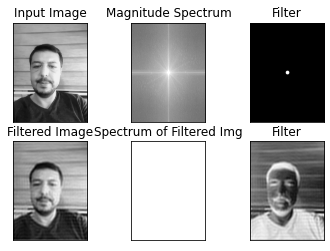

In [13]:
plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(magnitude_spectrum, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(H, cmap = 'gray')#lfp
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img_back[:,:,0], cmap = 'gray')#geri gosterim
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(magnitude_spectrum1, cmap = 'gray',vmin = 0, vmax = 255)
plt.title('Spectrum of Filtered Img'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(img-img_back[:,:,0], cmap = 'gray')
plt.title('Filter'), plt.xticks([]), plt.yticks([])
plt.show()
